### Importing Library

In [70]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# For data splitting
from sklearn.model_selection import train_test_split
# For handling imbalanced dataset
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [71]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
stroke_data.drop(columns=['id'],inplace=True)
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Since we want to use numeric variables, we will exclude the 'id' column. Categorical variables will not be discussed in this part.

### Numerical data

In [73]:
stroke_data1 = stroke_data.dropna(subset=['bmi'])

In [74]:
strokedata = stroke_data1[["age", "avg_glucose_level", "bmi"]]

In [75]:
strokedata.describe()

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


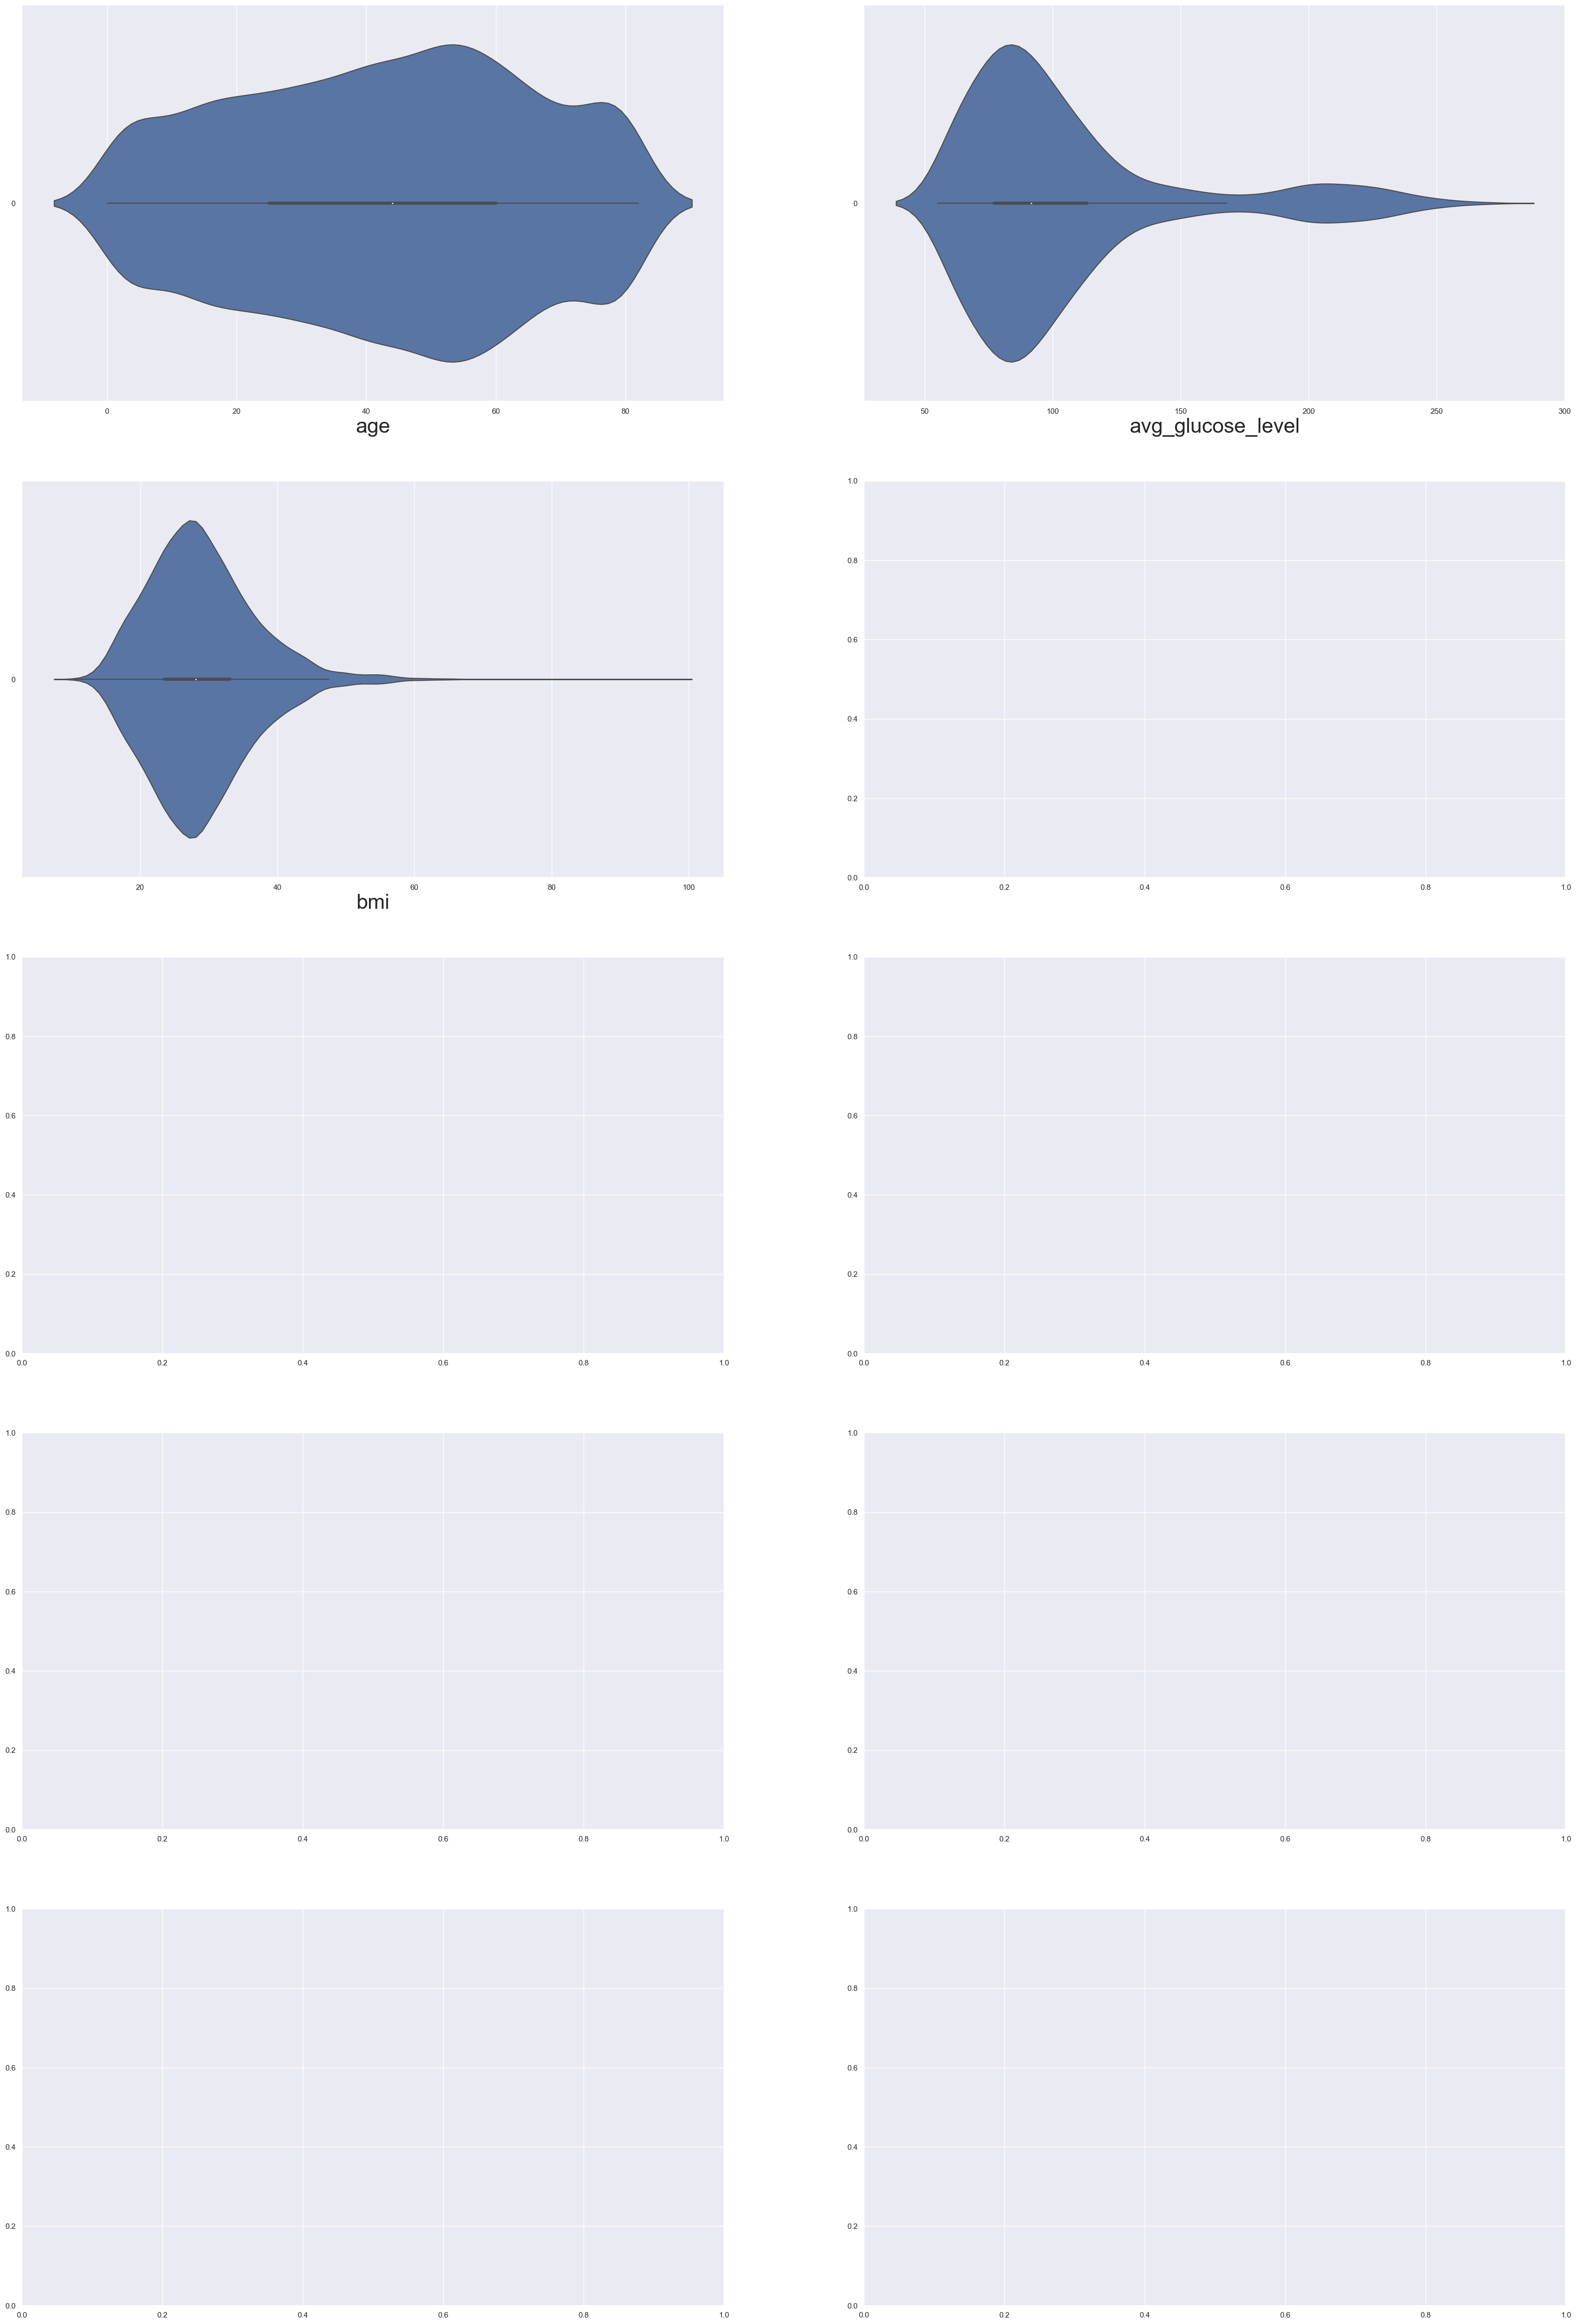

In [76]:
# Draw the distributions of all variables
f, axes = plt.subplots(5,2,figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in strokedata.columns]
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = strokedata[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

<AxesSubplot:>

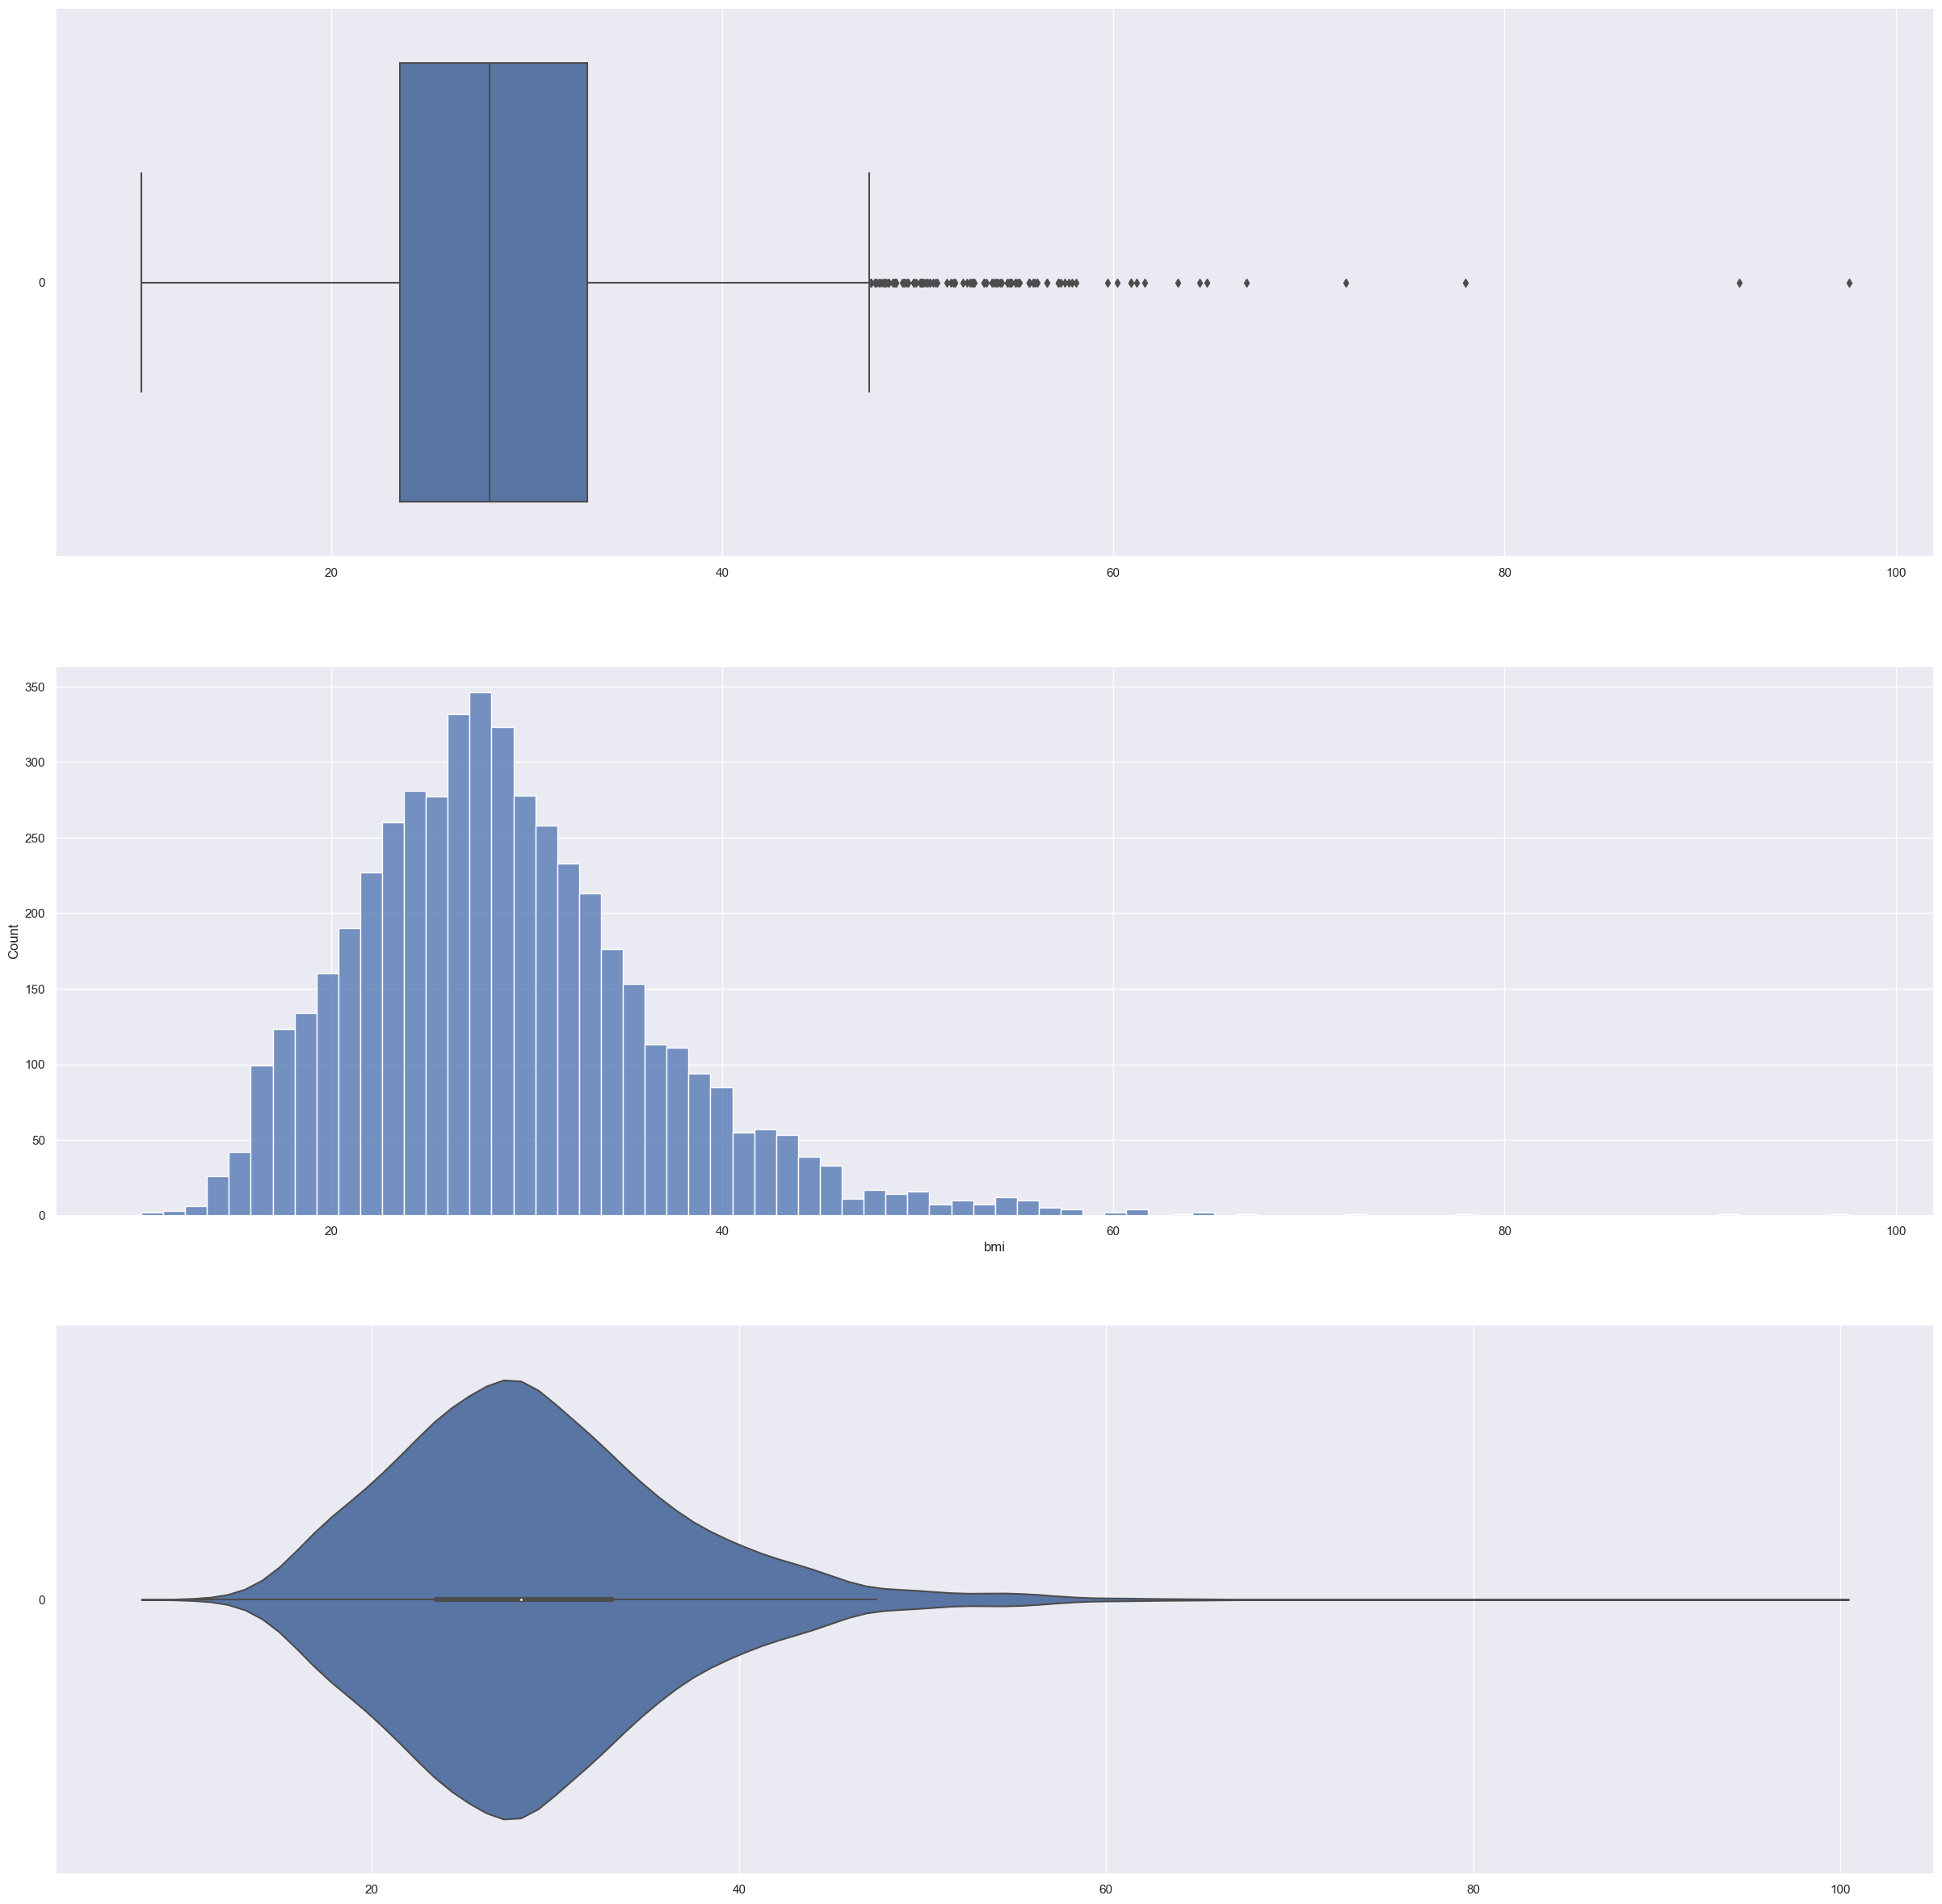

In [77]:
f, axes = plt.subplots(3,figsize=(30, 30))
sb.boxplot(data = strokedata["bmi"], orient = "h", ax = axes[0])
sb.histplot(data = strokedata["bmi"],ax = axes[1])
sb.violinplot(data = strokedata["bmi"], orient = "h", ax = axes[2])

In [78]:
np.percentile(strokedata["bmi"],80)

34.5

In [79]:
(strokedata["bmi"] >= 34.5).value_counts()

False    3911
True      998
Name: bmi, dtype: int64

In [80]:
# Rearrange columns
stroke_data = stroke_data[['gender', 'age', 'hypertension', 
         'heart_disease', 'ever_married', 'work_type', 
         'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke', 'bmi']]

stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.4
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.0


### Data Splitting

In [81]:
# Split the DF into predictors and response
X, y = stroke_data.iloc[:, :-1], stroke_data.iloc[:, -1]

# Define high bmi as bmi >= 34.5 (80% percentile)
y = (y >= 34.5).astype('int64')

# Split the dataset into 80% train and 20% test set
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

In [82]:
print("BMI Train Set Proportion")
print(y_train.value_counts()[1], ':', y_train.value_counts()[0])

BMI Train Set Proportion
783 : 3305


In [83]:
train_stroke_data = pd.concat([X_train, y_train], axis=1)
train_stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
323,Male,53.0,0,0,Yes,Private,Rural,90.12,Unknown,0,1
152,Female,80.0,0,0,Yes,Self-employed,Urban,76.57,never smoked,1,0
3539,Male,11.0,0,0,No,children,Rural,68.62,Unknown,0,0
1316,Female,21.0,0,0,No,Private,Urban,134.45,never smoked,0,0
3276,Female,79.0,0,0,Yes,Self-employed,Urban,78.32,Unknown,0,0


In [84]:
train_stroke_data.to_csv('train.csv')

### Random Oversampling on training data

In [85]:
# Define oversampling strategy (creates 1:2 ratio)
over_smp = RandomOverSampler(sampling_strategy=0.5, random_state=20)

# Fit and apply the transform
X_res, y_res = over_smp.fit_resample(X_train, y_train)

In [86]:
print("BMI Train Set Proportion (After oversampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

BMI Train Set Proportion (After oversampling)
1652 : 3305


In [87]:
# Combine the X and y to a single DF and rename column
oversampled_train_stroke_data = pd.concat([X_res, y_res], axis=1)
oversampled_train_stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,53.0,0,0,Yes,Private,Rural,90.12,Unknown,0,1
1,Female,80.0,0,0,Yes,Self-employed,Urban,76.57,never smoked,1,0
2,Male,11.0,0,0,No,children,Rural,68.62,Unknown,0,0
3,Female,21.0,0,0,No,Private,Urban,134.45,never smoked,0,0
4,Female,79.0,0,0,Yes,Self-employed,Urban,78.32,Unknown,0,0


In [88]:
oversampled_train_stroke_data.to_csv('oversampled-train.csv')

### SMOTETomek Resampling on training data

Only applies for numerical variables

In [89]:
# Select numerical variables only
X_train = X_train[['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'stroke']]
X_train.head()

,age,avg_glucose_level,heart_disease,hypertension,stroke
323,53.0,90.12,0,0,0
152,80.0,76.57,0,0,1
3539,11.0,68.62,0,0,0
1316,21.0,134.45,0,0,0
3276,79.0,78.32,0,0,0


In [90]:
# Set random_state for reproducibility
smt = SMOTETomek(random_state=20)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [91]:
print("BMI Train Set Proportion (After SMOTETomek resampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

BMI Train Set Proportion (After SMOTETomek resampling)
2977 : 2977


In [92]:
# Combine the X and y to a single DF and rename column
smotetomek_train_stroke_data = pd.concat([X_res, y_res], axis=1)
smotetomek_train_stroke_data.head()

,age,avg_glucose_level,heart_disease,hypertension,stroke,bmi
0,53.0,90.12,0,0,0,1
1,80.0,76.57,0,0,1,0
2,11.0,68.62,0,0,0,0
3,21.0,134.45,0,0,0,0
4,73.0,102.46,1,0,0,0


In [93]:
smotetomek_train_stroke_data.to_csv('smotetomek-train.csv')

### SMOTEENN Resampling on training data

Only applies for numerical variables

In [94]:
X_train = X_train[['age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'stroke']]
X_train.head()

,age,avg_glucose_level,heart_disease,hypertension,stroke
323,53.0,90.12,0,0,0
152,80.0,76.57,0,0,1
3539,11.0,68.62,0,0,0
1316,21.0,134.45,0,0,0
3276,79.0,78.32,0,0,0


In [95]:
# Set random_state for reproducibility
sme = SMOTEENN(random_state=20)
X_res, y_res = sme.fit_resample(X_train, y_train)

In [96]:
print("BMI Train Set Proportion (After SMOTEENN resampling)")
print(y_res.value_counts()[1], ':', y_res.value_counts()[0])

BMI Train Set Proportion (After SMOTEENN resampling)
1867 : 1535


In [97]:
# Combine the X and y to a single DF and rename column
smoteenn_train_stroke_data = pd.concat([X_res, y_res], axis=1)
smoteenn_train_stroke_data.head()

,age,avg_glucose_level,heart_disease,hypertension,stroke,bmi
0,11.0,68.62,0,0,0,0
1,21.0,134.45,0,0,0,0
2,64.0,63.32,0,0,0,0
3,72.0,104.05,0,0,0,0
4,81.0,57.42,0,0,0,0


In [98]:
smoteenn_train_stroke_data.to_csv('smoteenn-train.csv')

### Save test data as csv

In [99]:
# Combine the X and y to a single DF and rename column
test_stroke_data = pd.concat([X_test, y_test], axis=1)
test_stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
4924,Male,40.0,1,0,Yes,Self-employed,Urban,93.20,smokes,0,0
2218,Female,57.0,0,0,Yes,Govt_job,Urban,97.39,Unknown,0,1
2750,Female,59.0,0,0,Yes,Self-employed,Urban,90.04,formerly smoked,0,0
4907,Male,55.0,0,0,Yes,Private,Rural,56.87,formerly smoked,0,0
761,Female,37.0,0,0,No,Private,Rural,92.78,never smoked,0,1


In [100]:
test_stroke_data.to_csv('test.csv')